In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
insurance_df=pd.read_csv('insurance.csv')

In [3]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

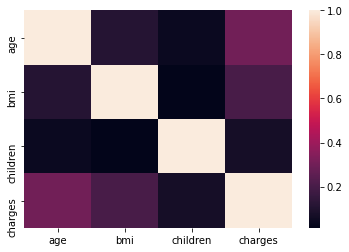

In [4]:
sns.heatmap(insurance_df.corr())

In [5]:
unique_region=insurance_df.region.unique()
unique_region

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
sw_insurance=insurance_df[insurance_df.region=='southwest']
sw_insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.92400
12,23,male,34.4,0,no,southwest,1826.84300
15,19,male,24.6,1,no,southwest,1837.23700
18,56,male,40.3,0,no,southwest,10602.38500
19,30,male,35.3,0,yes,southwest,36837.46700
...,...,...,...,...,...,...,...
1316,19,female,20.6,0,no,southwest,1731.67700
1329,52,male,38.6,2,no,southwest,10325.20600
1331,23,female,33.4,0,no,southwest,10795.93733
1332,52,female,44.7,3,no,southwest,11411.68500


c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi', ylabel='charges'>

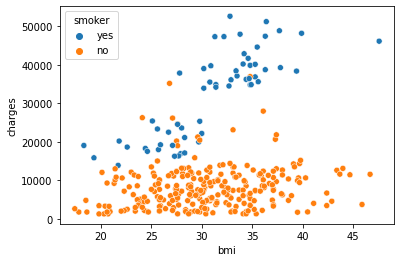

In [7]:
sns.scatterplot(sw_insurance.bmi,sw_insurance.charges,hue=sw_insurance.smoker)

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

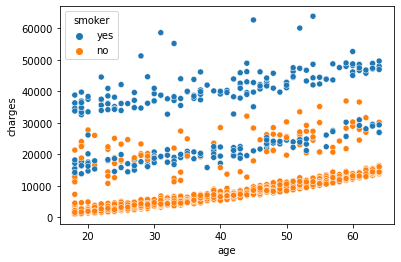

In [8]:
sns.scatterplot(insurance_df.age,insurance_df.charges,hue=insurance_df.smoker)

In [9]:
non_smoker=insurance_df[insurance_df.smoker=='no']
smoker=insurance_df[insurance_df.smoker=='yes']

In [10]:
smoker

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [11]:
smoker_x=insurance_df.age
smoker_y=insurance_df.charges

In [12]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(smoker_x,smoker_y,test_size=0.2,random_state=0,shuffle=True)

In [14]:
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [15]:
linreg.fit(x_train,y_train)

LinearRegression()

In [16]:
prediction=linreg.predict(x_test)
prediction

array([16278.18029845, 15086.32245041, 15324.69402002, 18423.52442491,
       16039.80872884, 11987.49204552,  8173.54693181, 16039.80872884,
       12940.97832395, 11272.3773367 , 11987.49204552, 15801.43715924,
       14132.83617199, 11749.12047592, 10318.89105828, 15801.43715924,
       18185.15285531, 10080.51948867, 12940.97832395,  8650.29007103,
       16039.80872884, 17231.66657688, 16278.18029845, 15086.32245041,
        9127.03321024, 11510.74890631, 10557.26262788, 13417.72146317,
       11272.3773367 , 14609.5793112 , 13417.72146317, 17946.7812857 ,
       18661.89599452, 16993.29500727,  9603.77634946, 11034.0057671 ,
       14847.95088081, 10557.26262788, 13417.72146317,  8650.29007103,
       12464.23518474, 10795.63419749, 13179.34989356, 17708.40971609,
        8173.54693181,  8888.66164063, 15801.43715924, 13894.46460238,
       11034.0057671 , 17470.03814648,  9365.40477985,  8411.91850142,
       15324.69402002, 16039.80872884, 17708.40971609, 10557.26262788,
      

In [17]:
from sklearn.metrics import r2_score

score=r2_score(y_test,prediction)

In [18]:
score

0.12539120236863355

In [19]:
female=insurance_df[insurance_df.sex=='female']
female.sex=-1
female

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,sex,bmi,children,smoker,region,charges
0,19,-1,27.90,0,yes,southwest,16884.92400
5,31,-1,25.74,0,no,southeast,3756.62160
6,46,-1,33.44,1,no,southeast,8240.58960
7,37,-1,27.74,3,no,northwest,7281.50560
9,60,-1,25.84,0,no,northwest,28923.13692
...,...,...,...,...,...,...,...
1332,52,-1,44.70,3,no,southwest,11411.68500
1334,18,-1,31.92,0,no,northeast,2205.98080
1335,18,-1,36.85,0,no,southeast,1629.83350
1336,21,-1,25.80,0,no,southwest,2007.94500


In [20]:
male=insurance_df[insurance_df.sex=='male']
male.sex=1
male

c:\users\harsh\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
8,37,1,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1324,31,1,25.935,1,no,northwest,4239.89265
1325,61,1,33.535,0,no,northeast,13143.33665
1327,51,1,30.030,1,no,southeast,9377.90470
1329,52,1,38.600,2,no,southwest,10325.20600


In [21]:
new_merged=pd.concat([male,female])
new_merged

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
8,37,1,29.830,2,no,northeast,6406.41070
...,...,...,...,...,...,...,...
1332,52,-1,44.700,3,no,southwest,11411.68500
1334,18,-1,31.920,0,no,northeast,2205.98080
1335,18,-1,36.850,0,no,southeast,1629.83350
1336,21,-1,25.800,0,no,southwest,2007.94500


In [47]:
new_merged.sex=(new_merged.sex!=-1).astype(int)

In [48]:
y_test

1131     3693.42800
1211    23563.01618
1111    41949.24410
712      8310.83915
395      7526.70645
           ...     
816      2842.76075
96      12105.32000
916     21774.32215
95       3766.88380
583     17626.23951
Name: charges, Length: 268, dtype: float64

In [49]:
new_merged.smoker=(new_merged.smoker !='no').astype(int)

In [50]:
new_merged

,age,sex,bmi,children,smoker,region,charges
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520
8,37,1,29.830,2,1,northeast,6406.41070
...,...,...,...,...,...,...,...
1332,52,1,44.700,3,1,southwest,11411.68500
1334,18,1,31.920,0,1,northeast,2205.98080
1335,18,1,36.850,0,1,southeast,1629.83350
1336,21,1,25.800,0,1,southwest,2007.94500


In [51]:
x_df=new_merged.drop(columns=['charges','region'])
y_df=new_merged.charges

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x_df,y_df,random_state=0,shuffle=True,test_size=0.2)

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [54]:
scale=MinMaxScaler(feature_range=(0,1))

In [55]:
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)
y_train=np.array(y_train).reshape((-1,1))
y_train=scale.fit_transform(y_train)

In [56]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [57]:
prediction=linreg.predict(x_test)
prediction

array([[0.24275875],
       [0.22918445],
       [0.25832078],
       [0.22742713],
       [0.16126041],
       [0.22653143],
       [0.22002509],
       [0.18718088],
       [0.15266178],
       [0.11263603],
       [0.16444366],
       [0.29302452],
       [0.29563732],
       [0.12202269],
       [0.21391092],
       [0.2456643 ],
       [0.2280342 ],
       [0.14729967],
       [0.16966035],
       [0.1117334 ],
       [0.3087637 ],
       [0.24475386],
       [0.26879503],
       [0.18079696],
       [0.28617147],
       [0.31755804],
       [0.22042184],
       [0.15377607],
       [0.1087463 ],
       [0.24473219],
       [0.27810853],
       [0.1469811 ],
       [0.16312052],
       [0.21628594],
       [0.29040366],
       [0.16216997],
       [0.35195707],
       [0.18138795],
       [0.2633621 ],
       [0.28799045],
       [0.11166717],
       [0.1843181 ],
       [0.13049534],
       [0.18262656],
       [0.15109501],
       [0.11083033],
       [0.2631931 ],
       [0.241

In [58]:
real_prediction=scale.inverse_transform(prediction)

In [59]:
poly_score=r2_score(y_test,real_prediction)
poly_score

0.06048820100197572